In [1]:
#import required libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#create user defined function for finding logistic regression
def sigmoid(x):
    x = np.clip(x, -500, 500)
    return 1 / (1 + np.exp(-x))

def logistic_regression(X, y, lr=0.01, num_iterations=1000, reg_lambda=0.1):
    m, n = X.shape
    intercept = np.ones((m, 1))
    X = np.hstack((intercept, X))
    theta = np.zeros(n + 1)
    cost_history = []
    
    for iteration in range(num_iterations):
        z = np.dot(X, theta)
        h = sigmoid(z)
        gradient = np.dot(X.T, (h - y)) / m
        regularization = (reg_lambda / m) * theta
        regularization[0] = 0  # Exclude regularization for intercept term
        theta -= lr * (gradient + regularization)
        
        # Calculate and store the cost
        cost = (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()
        cost_history.append(cost)
    
    return theta, cost_history

def predict(X, theta):
    m = X.shape[0]
    intercept = np.ones((m, 1))
    X = np.hstack((intercept, X))
    z = np.dot(X, theta)
    h = sigmoid(z)
    return (h >= 0.5).astype(int)

In [3]:
#read the dataset
parking_data = pd.read_csv(r'C:\Users\LOGESH\Downloads\MOCK_DATA (5).csv')

In [4]:
# Handle Missing Values with Mode
categorical_columns = ['Day','Time','Availability'] 
mode_values = parking_data[categorical_columns].mode().iloc[0]
parking_data[categorical_columns] = parking_data[categorical_columns].fillna(mode_values)


In [5]:
# Data Transformation
parking_data['Time'] = pd.to_datetime(parking_data['Time'], format='%H:%M').dt.hour * 60 + pd.to_datetime(parking_data['Time'], format='%H:%M').dt.minute
day_mapping = {'Monday': 0, 'Tuesday': 1, 'Wednesday': 2, 'Thursday': 3, 'Friday': 4, 'Saturday': 5, 'Sunday': 6}
parking_data['Day'] = parking_data['Day'].map(day_mapping)

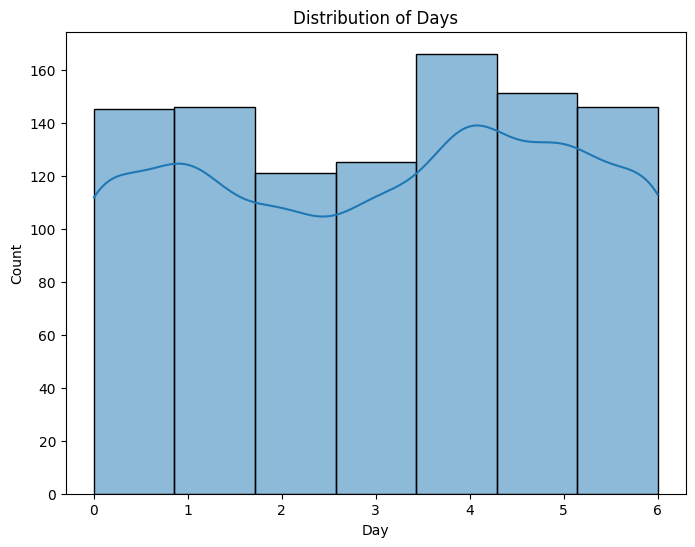

In [6]:
# EDA

plt.figure(figsize=(8, 6))
sns.histplot(parking_data['Day'], bins=7, kde=True)
plt.xlabel('Day')
plt.ylabel('Count')
plt.title('Distribution of Days')
plt.show()

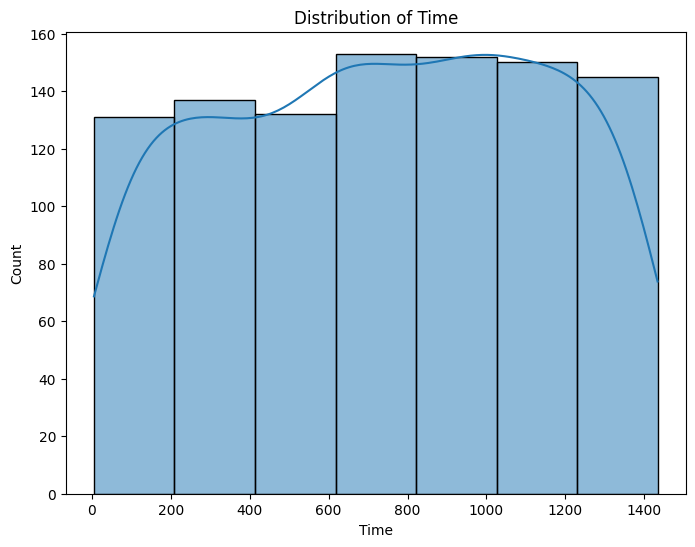

In [7]:
# histogram for Time
plt.figure(figsize=(8, 6))
sns.histplot(parking_data['Time'], bins=7, kde=True)
plt.xlabel('Time')
plt.ylabel('Count')
plt.title('Distribution of Time')
plt.show()

In [8]:
# Prepare the data
X = parking_data[['Time', 'Day']]
y = parking_data['Availability']

In [9]:
# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [10]:
# Splitting of data
np.random.seed(42)
indices = np.random.permutation(len(X_scaled))
train_size = int(0.8 * len(X_scaled))

X_train = X_scaled[indices[:train_size]]
y_train = y.iloc[indices[:train_size]]
X_test = X_scaled[indices[train_size:]]
y_test = y.iloc[indices[train_size:]]

In [11]:
#calling user defined func to find logistic regression
theta, cost_history = logistic_regression(X_train, y_train)

In [12]:
# Make predictions on the test set
y_pred = predict(X_test, theta)

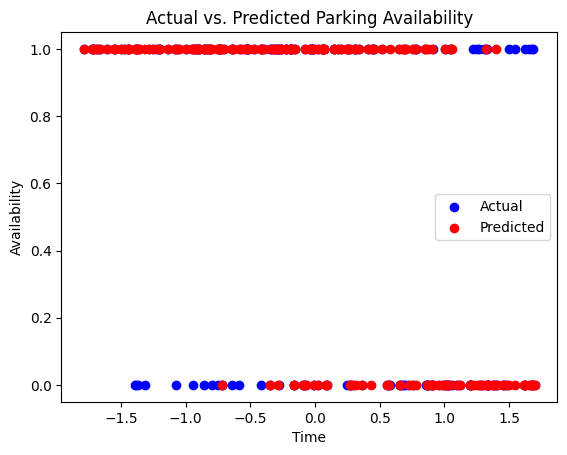

In [13]:
# scatter plot  between predicted and actual values
plt.scatter(X_test[:, 0], y_test, color='blue', label='Actual')
plt.scatter(X_test[:, 0], y_pred, color='red', label='Predicted')
plt.xlabel('Time')
plt.ylabel('Availability')
plt.legend()
plt.title('Actual vs. Predicted Parking Availability')
plt.show()

In [14]:
# Calculate accuracy
accuracy = (y_pred == y_test).mean()
print('Accuracy:', accuracy)

Accuracy: 0.79


In [15]:
# Make a prediction on new data
time_hr=6
time_min=44
day=3
new_data = pd.DataFrame({'Time': [time_hr*60 + time_min], 'Day': [day]})

# Scale the new data using the same scaler
new_data_scaled = scaler.transform(new_data)

In [16]:
# Predict the availability
availability_prediction = predict(new_data_scaled, theta)
print('Predicted Parking Availability:', availability_prediction)

Predicted Parking Availability: [1]


In [17]:
if (availability_prediction==0):
    print("parking may not be available")
elif(availability_prediction==1):
    print("parking is available")

parking is available


In [20]:
time_hr=0
time_min=0
day=6
new_data = pd.DataFrame({'Time': [time_hr*60 + time_min], 'Day': [day]})

# Scale the new data using the same scaler
new_data_scaled = scaler.transform(new_data)

In [19]:
availability_prediction = predict(new_data_scaled, theta)
print('Predicted Parking Availability:', availability_prediction)

Predicted Parking Availability: [0]
